In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re

In [2]:
from wordcloud import WordCloud 

In [3]:
import nltk.sentiment.vader

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tobis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
sid = SentimentIntensityAnalyzer()

In [7]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\python.exe -m pip install --upgrade pip' command.


In [8]:
df = pd.read_csv('SGE_english_final.csv')

In [9]:
df.head()

,Unnamed: 0,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords
0,0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m..."
1,1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡
2,2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W
3,3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️
4,4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎


In [10]:
df.columns

Index(['Unnamed: 0', 'Date', 'Tweet', 'User', 'Location', 'tweet', 'time',
       'weekday', 'Hour', 'Minute', 'translated_tweet',
       'tweet_without_stopwords'],
      dtype='object')

In [11]:
df = df[['Date', 'Tweet', 'User', 'Location',
       'tweet', 'time', 'weekday', 'Hour', 'Minute', 'translated_tweet','tweet_without_stopwords']]

In [12]:
len(df)

11202

In [13]:
df['time'] = pd.to_datetime(df['time'])#, format = '%y/%m/%d %H:%M:%S')

In [14]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m..."
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎


In [15]:
df['tweet_without_stopwords'] = df['tweet_without_stopwords'].astype(str)

In [16]:
df['scores'] = df['tweet_without_stopwords'].apply(lambda tweet_without_stopwords: sid.polarity_scores(tweet_without_stopwords))

In [17]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp..."
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [18]:
df['compound'] = df['scores'].apply(lambda d: d['compound'])

In [19]:
df['com_score'] = df['compound'].apply(lambda score: 'pos' if score > 0 else ('neg' if score < 0 else 'neu'))

In [20]:
df.head(50)

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.2960,pos
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
5,2022-02-16,b'@SGE_Lukas @LeroySane10SZN @roberazziszn SGE...,b'ElyasJD9',b'069',SGE LUKAS lutscht bei bayern erfolgsfan für...,2022-02-16 20:45:53+00:00,2,20,45,SBU LUKAS sucks at bayern success fan for orig...,SBU LUKAS sucks bayern success fan original 15...,"{'neg': 0.158, 'neu': 0.316, 'pos': 0.525, 'co...",0.7003,pos
6,2022-02-16,"b'@SGE_Lukas okay das ist geil, seit wann aber?'",b'ichliebemantu',b'786',"okay das ist geil, seit wann aber?",2022-02-16 20:42:36+00:00,2,20,42,"okay that's cool, but since when?","okay that's cool, since when?","{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.4939,pos
7,2022-02-16,b'@LeroySane10SZN @roberazziszn @SGE_Lukas Ler...,b'ElyasJD9',b'069',LeroySaneBayernSZN geht auf meine Mutter,2022-02-16 20:42:25+00:00,2,20,42,LeroySaneBayernSZN goes to my mother,LeroySaneBayernSZN goes mother,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
8,2022-02-16,b'@LeroySane10SZN @roberazziszn @SGE_Lukas ok ...,b'ElyasJD9',b'069',ok halt mal dein Maul jetzt dein club verli...,2022-02-16 20:41:23+00:00,2,20,41,ok shut your mouth now your club is losing,ok shut mouth club losing,"{'neg': 0.333, 'neu': 0.385, 'pos': 0.282, 'co...",-0.1027,neg
9,2022-02-16,b'@LeroySane10SZN @SGE_Lukas @ElyasJD9 Hab in ...,b'roberazziszn',b'',Hab in beiden gewohnt Bruder und ich kann’s...,2022-02-16 20:41:23+00:00,2,20,41,Lived in both brother and I can tell you,Lived brother I tell,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu


In [21]:
from textblob import TextBlob

In [22]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
df['Subjectivity'] = df['tweet_without_stopwords'].apply(getSubjectivity)

In [24]:
df['Polarity'] = df['tweet_without_stopwords'].apply(getPolarity)

In [25]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score,Subjectivity,Polarity
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.296,pos,0.5,0.5
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.5,0.5
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,1.0,0.0
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0


In [26]:
# Plot WordCloud
allWords = ' '.join([twts for twts in df['tweet_without_stopwords']])
wordCloud = WordCloud(width = 500, height =300, random_state = 21, max_font_size = 119).generate(allWords)

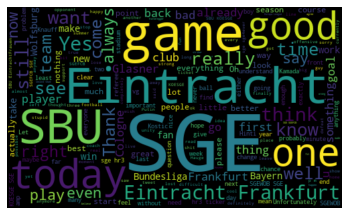

In [27]:
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [28]:
df['com_score'].value_counts()

neu    4675
pos    4275
neg    2252
Name: com_score, dtype: int64

In [29]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score,Subjectivity,Polarity
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.296,pos,0.5,0.5
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.5,0.5
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,1.0,0.0
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0


In [30]:
df.describe()

,weekday,Hour,Minute,compound,Subjectivity,Polarity
count,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000
mean,3.488663,14.798250,28.544724,0.091862,0.301191,0.059662
std,1.864700,4.944257,17.222259,0.357314,0.329993,0.286284
min,0.000000,0.000000,0.000000,-0.938200,0.000000,-1.000000
25%,2.000000,11.000000,14.000000,0.000000,0.000000,0.000000
50%,4.000000,16.000000,28.000000,0.000000,0.200000,0.000000
75%,5.000000,19.000000,43.000000,0.381800,0.535714,0.166667
max,6.000000,23.000000,59.000000,0.958300,1.000000,1.000000


In [31]:
pd.pivot_table(df, index = 'Date', values = 'compound')#, columns = 'col3')

,compound
Date,
2022-02-08,0.121877
2022-02-09,0.126353
2022-02-10,0.137337
2022-02-11,0.154792
2022-02-12,0.031472
2022-02-13,0.094545
2022-02-14,0.095617
2022-02-15,0.105001
2022-02-16,0.115604


In [33]:
df['value'] = 1

In [34]:
df_totalTweets = pd.pivot_table(df, index = 'com_score', values = 'value', aggfunc='count')#, columns = 'col3')

In [35]:
df_totalTweets.to_csv('df_totalTweets_SGE.csv')

In [36]:
df['Hour'] = df['Hour'].astype(int)

In [37]:
import datetime as dt

In [38]:
df.tail(50)

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score,Subjectivity,Polarity,value
11152,2022-02-20,b'@SGE_Unknown Warum auch? W\xc3\xa4re v\xc3\x...,b'beatlechen',b'Bad Vilbel',Warum auch? Wäre völliger Quatsch.,2022-02-20 10:30:07+00:00,6,10,30,why? Would be complete nonsense.,why? Would complete nonsense.,"{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'comp...",-0.4019,neg,0.400000,0.100000,1
11153,2022-02-20,b'Trainer Steffen Baumgart freut sich \xc3\xbc...,b'Uehmche',b'Im Herzen der Welt',Trainer Steffen Baumgart freut sich über den n...,2022-02-20 10:26:47+00:00,6,10,26,Coach Steffen Baumgart is happy about the not ...,Coach Steffen Baumgart happy undeserved victor...,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.5719,pos,0.650000,0.250000,1
11154,2022-02-20,b'@EduardoSGE Verlangt ja auch keiner von dir',b'sge_paul',b'069',Verlangt ja auch keiner von dir,2022-02-20 10:26:14+00:00,6,10,26,Nobody asks you either,Nobody asks either,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000,1
11155,2022-02-20,b'@sge_paul Das ist klar\nAber ich w\xc3\xbcrd...,b'EduardoSGE',b'Im Herzen Von Europa ',Das ist klar\nAber ich würde niemals auf Demo...,2022-02-20 10:25:25+00:00,6,10,25,That is clear\nBut I would never go to a demo ...,That clear But I would never go demo protest,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.5171,pos,0.383333,0.100000,1
11156,2022-02-20,b'@EduardoSGE Unterst\xc3\xbctzen ist alleine ...,b'sge_paul',b'069',Unterstützen ist alleine schon wenn du dazwis...,2022-02-20 10:24:32+00:00,6,10,24,Support is already when you intervene when som...,Support already intervene someone homophobical...,"{'neg': 0.243, 'neu': 0.522, 'pos': 0.235, 'co...",-0.0258,neg,0.000000,0.000000,1
11157,2022-02-20,b'@sge_paul @Niklas12543 @19moonlightbae oder ...,b'gxbu_x',b'',oder du erwartest dass ich das unterstütze ...,2022-02-20 10:23:37+00:00,6,10,23,or you expect me to support it without you acc...,expect support without accepting opinion,"{'neg': 0.277, 'neu': 0.381, 'pos': 0.342, 'co...",0.1321,pos,0.000000,0.000000,1
11158,2022-02-20,b'@gxbu_x @Niklas12543 @19moonlightbae Entwede...,b'sge_paul',b'069',Entweder bist du noch deutlich zu jung um T...,2022-02-20 10:22:59+00:00,6,10,22,Either you are clearly too young to be allowed...,Either clearly young allowed use Twitter b...,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.4019,pos,0.400000,0.100000,1
11159,2022-02-20,b'@sge_paul @Niklas12543 @19moonlightbae mich ...,b'gxbu_x',b'',mich juckt das nicht was du sagst einfach a...,2022-02-20 10:21:27+00:00,6,10,21,"I don't care what you say, it's all nonsense, ...","I care say, nonsense, go mother.","{'neg': 0.303, 'neu': 0.337, 'pos': 0.36, 'com...",0.1280,pos,0.000000,0.000000,1
11160,2022-02-20,b'@CMoffiziell @franky_sge Kr\xc3\xb6sche sagt...,b'MichaelReucker',b'',"Krösche sagte doch gestern, dass die Qualitä...",2022-02-20 10:21:19+00:00,6,10,21,Krösche said yesterday that the quality is the...,Krösche said yesterday quality deny it.,"{'neg': 0.324, 'neu': 0.676, 'pos': 0.0, 'comp...",-0.3400,neg,0.000000,0.000000,1
11161,2022-02-20,b'@gxbu_x @Niklas12543 @19moonlightbae Es tut ...,b'sge_paul',b'069',Es tut mir schrecklich leid wirst du es ver...,2022-02-20 10:20:19+00:00,6,10,20,"I'm terribly sorry, will you be able to take it?","I'm terribly sorry, able take it?","{'neg': 0.551, 'neu': 0.449, 'pos': 0.0, 'comp...",-0.5994,neg,0.812500,0.000000,1


In [39]:
#df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)

In [40]:
df['datetime'] = df['Date'].astype(str) + ' '+ df['Hour'].astype(str)

In [41]:
df['datetime'] = df['datetime'].str.replace('\s(\d)$', ' 0\\1')

<ipython-input-41-757bad35e65a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['datetime'] = df['datetime'].str.replace('\s(\d)$', ' 0\\1')


In [42]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H')

In [43]:
df_datetime = pd.pivot_table(df, index = 'datetime', values = 'compound')#, columns = 'col3')

In [44]:
df_datetime.head(50)

,compound
datetime,
2022-02-08 16:00:00,0.049839
2022-02-08 17:00:00,0.101658
2022-02-08 18:00:00,0.115450
2022-02-08 19:00:00,-0.000338
2022-02-08 20:00:00,0.186470
2022-02-08 21:00:00,0.276905
2022-02-08 22:00:00,0.272583
2022-02-08 23:00:00,0.268675
2022-02-09 00:00:00,0.120550


In [45]:
df_day = pd.pivot_table(df, index = 'weekday', values = 'value', columns = 'com_score', aggfunc='count')

In [46]:
df_day.head(7)

com_score,neg,neu,pos
weekday,,,
0,195,491,392
1,162,440,338
2,268,671,563
3,297,674,637
4,211,628,487
5,851,1280,1349
6,268,491,509


In [47]:
df_day.reset_index(inplace=True)

In [48]:
d = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [49]:
df_weekday = pd.DataFrame(d.items(), columns=['weekday', 'day'])

In [50]:
df_day = pd.merge(df_day,df_weekday, how='inner',on='weekday')

In [51]:
df_day.head(8)

,weekday,neg,neu,pos,day
0,0,195,491,392,Monday
1,1,162,440,338,Tuesday
2,2,268,671,563,Wednesday
3,3,297,674,637,Thursday
4,4,211,628,487,Friday
5,5,851,1280,1349,Saturday
6,6,268,491,509,Sunday


In [52]:
df_day.to_csv('df_day_SGE.csv')

In [53]:
df_hour = pd.pivot_table(df, index = 'Hour', values = 'value', columns = 'com_score', aggfunc='count')

In [54]:
df_hour.to_csv('df_hour_SGE.csv')

In [55]:
df.columns

Index(['Date', 'Tweet', 'User', 'Location', 'tweet', 'time', 'weekday', 'Hour',
       'Minute', 'translated_tweet', 'tweet_without_stopwords', 'scores',
       'compound', 'com_score', 'Subjectivity', 'Polarity', 'value',
       'datetime'],
      dtype='object')

In [56]:
df_sentiment = pd.pivot_table(df, index = 'datetime', values = 'value', columns = 'com_score', aggfunc='count')

In [57]:
df_sentiment.columns

Index(['neg', 'neu', 'pos'], dtype='object', name='com_score')

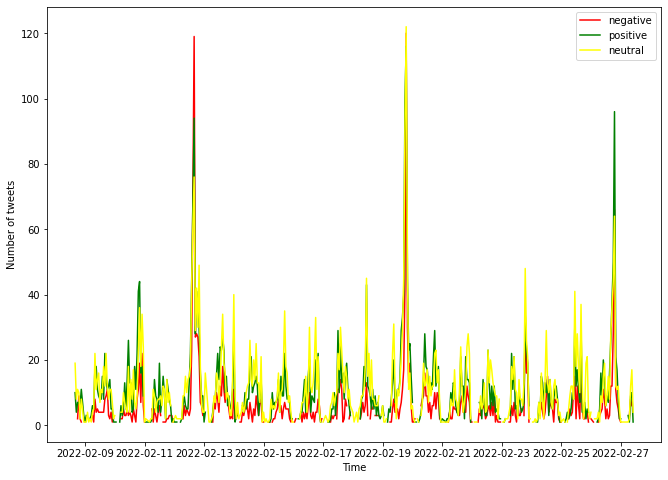

In [58]:
plt.figure(figsize=(11,8))
plt.xlabel("Time")
plt.ylabel('Number of tweets')
plt.gca().set_prop_cycle(color=['red', 'green', 'yellow'])
plt.plot(df_sentiment[['neg','pos','neu']])
plt.legend(['negative','positive','neutral'])

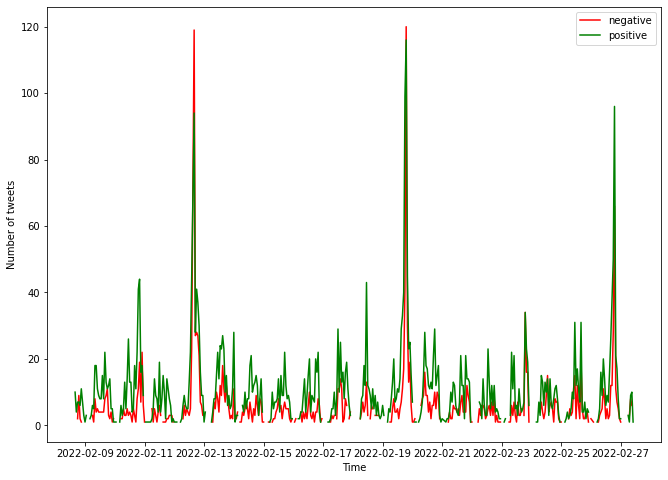

In [59]:
plt.figure(figsize=(11,8))
plt.xlabel("Time")
plt.ylabel('Number of tweets')
plt.gca().set_prop_cycle(color=['red', 'green'])
plt.plot(df_sentiment[['neg','pos']])
plt.legend(['negative','positive','neutral'])

In [60]:
df_sentiment.to_csv('df_sentiment_SGE.csv')

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [63]:
dtm = tfidf.fit_transform(df['tweet_without_stopwords'])

In [64]:
dtm

<11202x4578 sparse matrix of type '<class 'numpy.float64'>'
	with 50389 stored elements in Compressed Sparse Row format>

In [65]:
from sklearn.decomposition import NMF

In [66]:
nmf_model = NMF(n_components=5,random_state=42)

In [67]:
nmf_model.fit(dtm)

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=5, random_state=42)

In [68]:
for index,topic in enumerate(nmf_model.components_):
    print(f"The top 15 words for topic # {index}")
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

The top 15 words for topic # 0
['hinti', 'team', 'sgefb', 'today', 'news', 'fans', 'sge4ever', 'win', 'hr3', 'ticker', 'game', 'koesge', 'sgewob', 'sgefcb', 'sge']


The top 15 words for topic # 1
['today', 'world', 'course', 'thanks', 'bit', 'way', 'true', 'look', 'exactly', 'say', 'unfortunately', 'oh', 'better', 'right', 'yes']


The top 15 words for topic # 2
['glasner', 'fc', 'league', 'team', 'time', 'hr3', 'wolfsburg', 'cologne', 'saw', 'game', 'bayern', 'koesge', 'frankfurt', 'sbu', 'eintracht']


The top 15 words for topic # 3
['enjoy', 'tom', 'great', 'read', 'cool', 'going', 'care', 'difficult', 'dear', 'frank', 'say', 'commitment', 'god', 'lt', 'thank']


The top 15 words for topic # 4
['great', 'way', 'want', 'today', 'right', 'bad', 'oh', 'say', 'thanks', 'game', 'think', 'know', 'really', 'good', 'like']




In [69]:
topic_results = nmf_model.transform(dtm)

In [70]:
df['Topic'] = topic_results.argmax(axis=1)

In [71]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score,Subjectivity,Polarity,value,datetime,Topic
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.296,pos,0.5,0.5,1,2022-02-16 20:00:00,4
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.5,0.5,1,2022-02-16 20:00:00,2
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,1.0,0.0,1,2022-02-16 20:00:00,2
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0,1,2022-02-16 20:00:00,4
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0,1,2022-02-16 20:00:00,2


In [ ]:
# Anzahl an negativen und positiven Tweets gesamt
# Anzahl Tweets pro Tag und Stunde
